<a href="https://colab.research.google.com/github/Ehtisham1053/Data-Pre-Processing/blob/main/Binning_Binarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

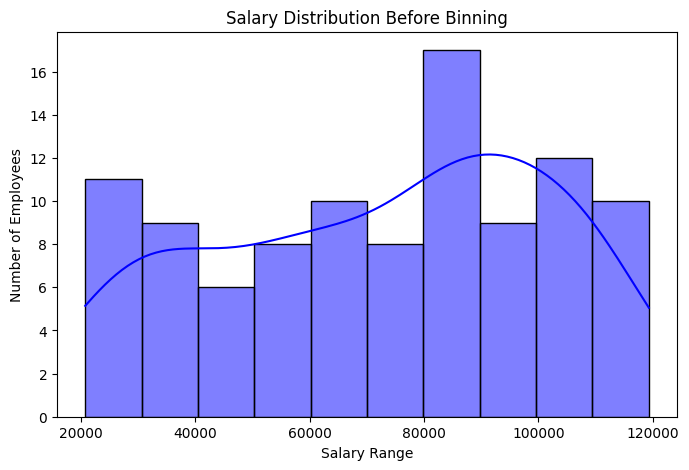

<ipython-input-6-e760d3b617c3>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Fixed_Binning'], palette='coolwarm', ax=axes[0])
<ipython-input-6-e760d3b617c3>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Quantile_Binning'], palette='coolwarm', ax=axes[1])
<ipython-input-6-e760d3b617c3>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Custom_Binning'], palette='coolwarm', ax=axes[2])


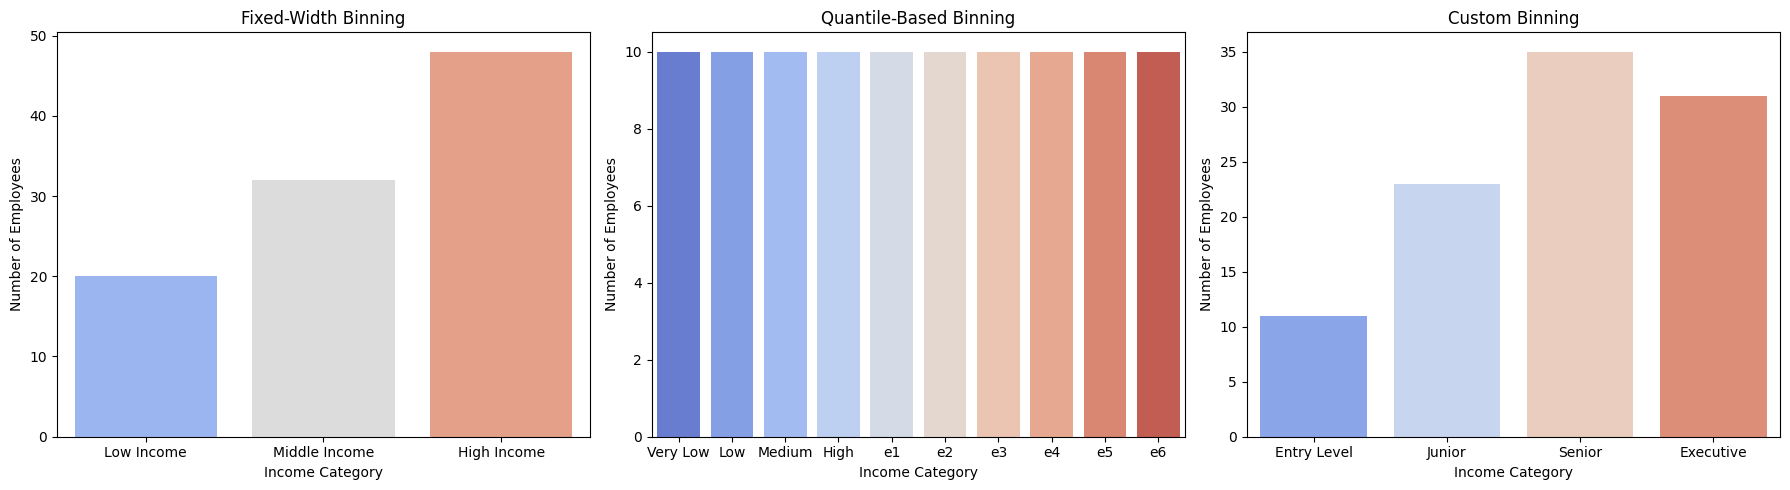

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
salaries = np.random.randint(20000, 120000, 100)  # 100 employees for better visualization
df = pd.DataFrame({'Employee_ID': range(1, 101), 'Salary': salaries})

plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], bins=10, kde=True, color='blue', edgecolor='black')
plt.xlabel('Salary Range')
plt.ylabel('Number of Employees')
plt.title('Salary Distribution Before Binning')
plt.show()

# 📌 1. Fixed-Width Binning (Equal Interval)
fixed_bins = [0, 40000, 80000, 120000]
fixed_labels = ['Low Income', 'Middle Income', 'High Income']
df['Fixed_Binning'] = pd.cut(df['Salary'], bins=fixed_bins, labels=fixed_labels, include_lowest=True)

# 📌 2. Quantile-Based Binning (Equal Frequency)
df['Quantile_Binning'] = pd.qcut(df['Salary'], q=10, labels=['Very Low', 'Low', 'Medium', 'High' , 'e1' , 'e2' , 'e3' , 'e4' , 'e5', 'e6'])

# 📌 3. Custom Binning Based on Domain Knowledge
custom_bins = [0, 30000, 60000, 90000, 120000]
custom_labels = ['Entry Level', 'Junior', 'Senior', 'Executive']
df['Custom_Binning'] = pd.cut(df['Salary'], bins=custom_bins, labels=custom_labels, include_lowest=True)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Fixed-Width Binning
sns.countplot(x=df['Fixed_Binning'], palette='coolwarm', ax=axes[0])
axes[0].set_title('Fixed-Width Binning')
axes[0].set_xlabel('Income Category')
axes[0].set_ylabel('Number of Employees')

# Plot 2: Quantile-Based Binning
sns.countplot(x=df['Quantile_Binning'], palette='coolwarm', ax=axes[1])
axes[1].set_title('Quantile-Based Binning')
axes[1].set_xlabel('Income Category')
axes[1].set_ylabel('Number of Employees')

# Plot 3: Custom Binning
sns.countplot(x=df['Custom_Binning'], palette='coolwarm', ax=axes[2])
axes[2].set_title('Custom Binning')
axes[2].set_xlabel('Income Category')
axes[2].set_ylabel('Number of Employees')

plt.tight_layout()
plt.show()


In [10]:
df.head(3)

,Employee_ID,Salary,Fixed_Binning,Quantile_Binning,Custom_Binning
0,1,35795,Low Income,Low,Junior
1,2,20860,Low Income,Very Low,Entry Level
2,3,96820,High Income,e4,Executive


# Binarization


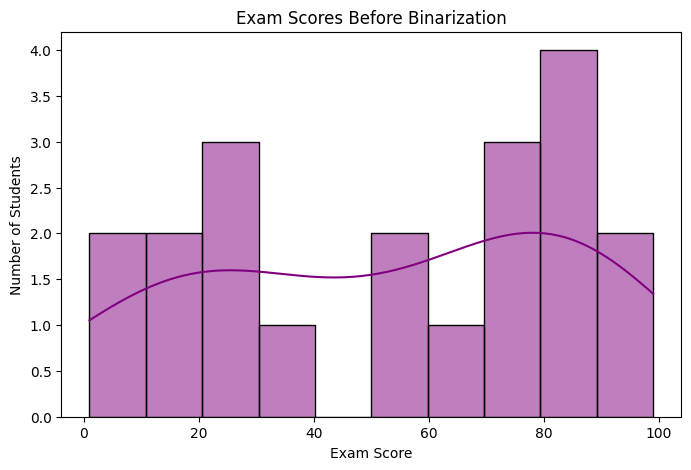

<ipython-input-11-30b0dd1ab40b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Pass_Fail'], palette='coolwarm')


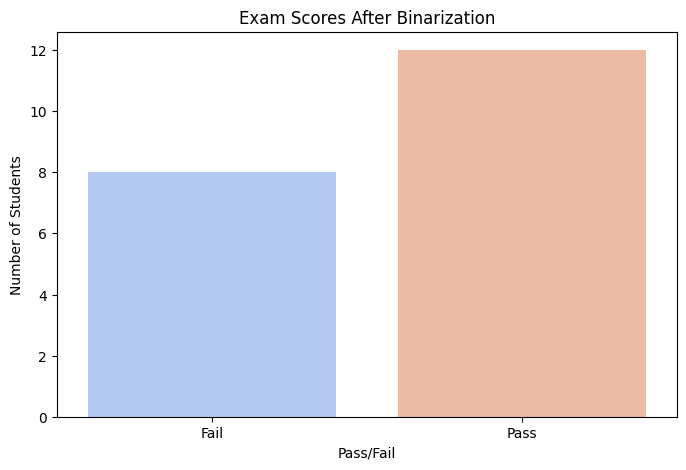

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Binarizer
np.random.seed(42)
scores = np.random.randint(0, 100, 20)
df = pd.DataFrame({'Student_ID': range(1, 21), 'Score': scores})

plt.figure(figsize=(8, 5))
sns.histplot(df['Score'], bins=10, kde=True, color='purple', edgecolor='black')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.title('Exam Scores Before Binarization')
plt.show()

binarizer = Binarizer(threshold=50)
df['Pass_Fail'] = binarizer.fit_transform(df[['Score']])

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Pass_Fail'], palette='coolwarm')
plt.xlabel('Pass/Fail')
plt.ylabel('Number of Students')
plt.title('Exam Scores After Binarization')
plt.xticks([0, 1], ['Fail', 'Pass'])
plt.show()





In [12]:
df.head(5)

,Student_ID,Score,Pass_Fail
0,1,51,1
1,2,92,1
2,3,14,0
3,4,71,1
4,5,60,1
